In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [0]:
seed = 7
numpy.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]



In [0]:
def baseline_model():
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='AdaGrad', metrics=['accuracy'])
	return model
model = baseline_model()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.1801 - acc: 0.9463 - val_loss: 0.0683 - val_acc: 0.9786
Epoch 2/10
 - 3s - loss: 0.0675 - acc: 0.9803 - val_loss: 0.0476 - val_acc: 0.9846
Epoch 3/10
 - 3s - loss: 0.0523 - acc: 0.9844 - val_loss: 0.0434 - val_acc: 0.9860
Epoch 4/10
 - 3s - loss: 0.0432 - acc: 0.9872 - val_loss: 0.0407 - val_acc: 0.9858
Epoch 5/10
 - 3s - loss: 0.0381 - acc: 0.9883 - val_loss: 0.0372 - val_acc: 0.9872
Epoch 6/10
 - 3s - loss: 0.0338 - acc: 0.9904 - val_loss: 0.0373 - val_acc: 0.9879
Epoch 7/10
 - 3s - loss: 0.0310 - acc: 0.9908 - val_loss: 0.0368 - val_acc: 0.9873
Epoch 8/10
 - 3s - loss: 0.0285 - acc: 0.9912 - val_loss: 0.0326 - val_acc: 0.9881
Epoch 9/10
 - 3s - loss: 0.0259 - acc: 0.9922 - val_loss: 0.0315 - val_acc: 0.9887
Epoch 10/10
 - 3s - loss: 0.0244 - acc: 0.9928 - val_loss: 0.0314 - val_acc: 0.9897
CNN Error: 1.03%


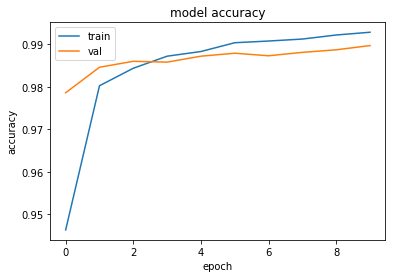

In [0]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()